In [1]:
from sklearn import datasets

newgroups = datasets.fetch_20newsgroups(subset='all', 
                                      categories=['alt.atheism', 'sci.space'])

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(newgroups.data, newgroups.target)

### cross_val_score 
#### Находим оптимальный параметр С

In [4]:
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

kf = sklearn.model_selection.KFold(n_splits=5, random_state=241)

p = []
for i in range(-5, 6):
     p.append(cross_val_score(SVC(C=pow(10, i), random_state=241, 
                                  kernel='linear'), features, 
                              newgroups.target, cv=kf).mean())

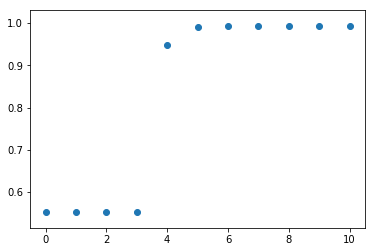

6

In [14]:
from matplotlib import pyplot as plt

plt.scatter([x for x in range(11)], p)
plt.show()

p.index(max(p))

### Находим оптимальный параметр C c помощью GridSearchCV

In [13]:
import sklearn
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid = {'C': np.power(10.0, np.arange(-5, 6))} 
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=241) 

gs = GridSearchCV(SVC(kernel='linear', random_state=241), grid, 
                      scoring='accuracy', cv=kf)
gs.fit(features, newgroups.target)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### Подбираем минимальный оптимальный (при котором лучшее качество) параметр С. 

In [15]:
for a in gs.grid_scores_:
    print(a.mean_validation_score)
    print(a.parameters)    

0.552631578947
{'C': 1.0000000000000001e-05}
0.552631578947
{'C': 0.0001}
0.552631578947
{'C': 0.001}
0.552631578947
{'C': 0.01}
0.950167973124
{'C': 0.10000000000000001}
0.993281075028
{'C': 1.0}
0.993281075028
{'C': 10.0}
0.993281075028
{'C': 100.0}
0.993281075028
{'C': 1000.0}
0.993281075028
{'C': 10000.0}
0.993281075028
{'C': 100000.0}


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [16]:
clf = SVC(C=1, random_state=241, kernel='linear')
clf.fit(features, newgroups.target)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
weights = []
inds = []
for i in clf.coef_.transpose():
    weights.append(abs(i[0,0]))
    
weights = sorted(weights, reverse=True)[:10]

### Нахождение индексов слов с максимальными весами

In [23]:
inds = []
for w in weights:
    i = 0
    for c in clf.coef_.transpose():
        if abs(c[0, 0]) == w:
            inds.append(i)
            break
        i += 1

In [25]:
max_priority_words = []
feature_mapping = tfidf.get_feature_names()
for i in inds:
    max_priority_words.append(feature_mapping[i])
    
max_priority_words = sorted(max_priority_words)

In [32]:
f = open('task01.txt', 'w', encoding='utf-8')
f.write(str(' '.join(max_priority_words)))

max_priority_words

['atheism',
 'atheists',
 'bible',
 'god',
 'keith',
 'moon',
 'religion',
 'sci',
 'sky',
 'space']